In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_51980_Z')

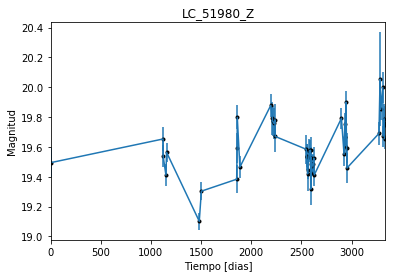

In [2]:
data = np.genfromtxt('LC_51980_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_51980_Z')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

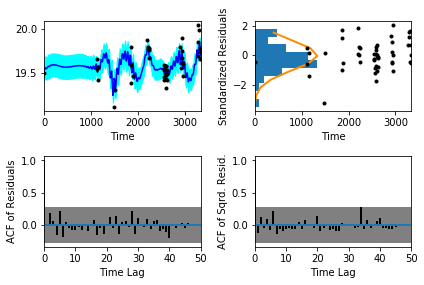

In [5]:
sample.assess_fit()

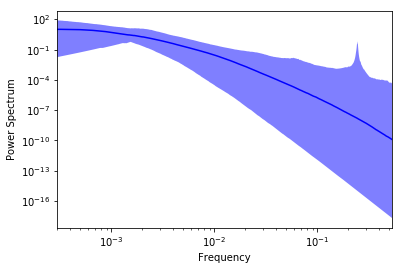

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_51980_Z')

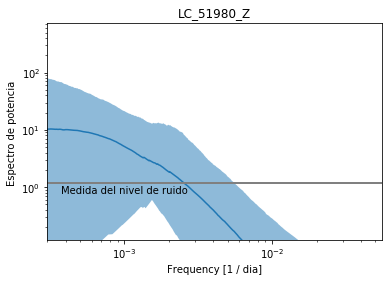

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_51980_Z')

Text(0.5,1,'Prediccion , valor esperado LC_51980_Z')

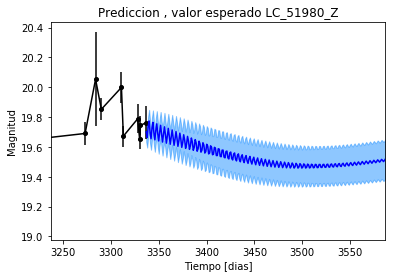

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_51980_Z')

Text(0.5,1,'Prediccion, Caminos simulados LC_51980_Z')

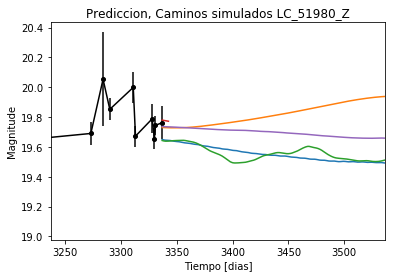

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_51980_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_51980_Z')

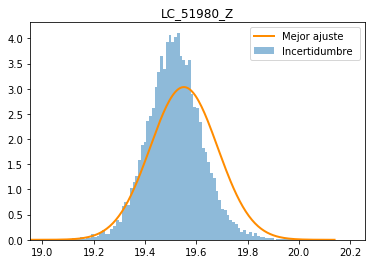

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_51980_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_51980_Z')

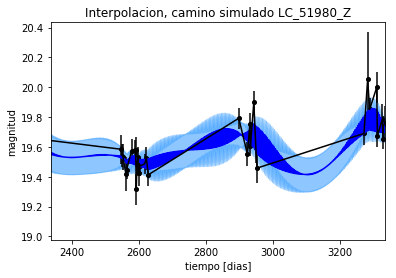

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_51980_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_51980_Z')

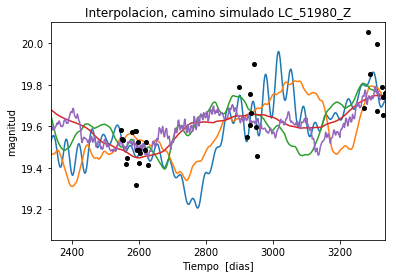

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_51980_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 674.312206613
Median: 0.00315276034124
Standard deviation: 0.175589451969
68% credibility interval: [ 0.00065352  0.09475299]
95% credibility interval: [  3.38925680e-04   7.07277723e-01]
99% credibility interval: [  3.05691134e-04   9.76905650e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1025.15667635
Median: 0.00156990703594
Standard deviation: 0.0897470310824
68% credibility interval: [ 0.0005079   0.01798654]
95% credibility interval: [ 0.00032661  0.24589237]
99% credibility interval: [  3.03664939e-04   6.91219529e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 947.370011884
Median: 0.0109906944429
Standard

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 158.718896069
Median: 48.6563635153
Standard deviation: 2.19204958863
68% credibility interval: [ 46.8929229   50.11270143]
95% credibility interval: [ 44.64358029  53.97683552]
99% credibility interval: [ 42.79413493  54.26334719]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 648.245077535
Median: 0.414862873407
Standard deviation: 2.11194429932
68% credibility interval: [ 0.03003595  3.30660137]
95% credibility interval: [ 0.01276108  7.06185819]
99% credibility interval: [  9.43396415e-03   1.11279236e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 338.26086384
Median: 0.624669931348
Standard deviation: 9.5590464962
68% credibility interval: [ 0.01289857  7.27245705]
95% credibility interval: [  5.212

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1486.06840871
Median: 1.2401665473e-40
Standard deviation: 2.63882485765e+140
68% credibility interval: [  2.10666523e-137   7.43509295e+032]
95% credibility interval: [  1.35712068e-212   3.77574856e+104]
99% credibility interval: [  4.62635082e-228   4.84009609e+126]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2322.41652264
Median: 19.5762530198
Standard deviation: 0.0886900151341
68% credibility interval: [ 19.50181548  19.64859602]
95% credibility interval: [ 19.38869859  19.75128352]
99% credibility interval: [ 19.27426005  19.85767237]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 360.781794732
Median: 0.0436458799239
Standard deviation: 0.242605902142
68% credibility interval: [ 0.          0.34160892]
95% credibility interval: [ 0.          0.90754704]
99% credibility interval: [ 0.          1.00706693]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 360.781794732
Median: 0.0436458799239
Standard deviation: 0.242605902142
68% credibility interval: [ 0.          0.34160892]
95% credibility interval: [ 0.          0.90754704]
99% credibility interval: [ 0.          1.00706693]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 269.039541311
Median: 0.0
Standard deviation: 0.000929178349657
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 158.718896069
Median: 48.6563635153
Standard deviation: 2.19204958863
68% credibility interval: [ 46.8929229   50.11270143]
95% credibility interval: [ 44.64358029  53.97683552]
99% credibility interval: [ 42.79413493  54.26334719]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1971.62878498
Median: 0.0373590644627
Standard deviation: 0.0386764692094
68% credibility interval: [ 0.02249711  0.06978344]
95% credibility interval: [ 0.01480968  0.13989757]
99% credibility interval: [ 0.01110831  0.26358519]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 208.32381803
Median: 1.2179027005
Standard deviation: 0.233001910631
68% credibility interval: [ 0.97912624  1.45231301]
95% credibility interval: [ 0.79775965  1.71350914]
99% credibility interval: [ 0.77063246  1.87020128]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1529.06673308
Median: 5.72337831936e-05
Standard deviation: 0.216618608365
68% credibility interval: [  5.28450448e-35   1.27866112e-02]
95% credibility interval: [  2.16635350e-108   4.03416089e-001]
99% credibility interval: [  1.24825633e-129   1.42165093e+000]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 674.312206613
Median: (-0.0198093774532-1.54762823918j)
Standard deviation: 1.8816989203
68% credibility interval: [-0.59535061-1.06109326j -0.00410617-0.0184044j ]
95% credibility interval: [ -4.44395700e+00+0.j          -2.12953285e-03-4.53495223j]
99% credibility interval: [ -6.13807922e+00+0.j          -1.92071404e-03-0.65788277j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1025.15667635
Median: (-0.00986401682185+0j)
Standard deviation: 1.62529564463
68% credibility interval: [-0.11301274+1.36297292j -0.00319123+0.j        ]
95% credibility interval: [-1.54498735+1.03961613j -0.00205215+0.42068753j]
99% credibility interval: [ -4.34306039e+00+3.4096845j  -1.90798308e-03+0.0047107j]
Posterior summary for parame